In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow import one_hot
import tensorflow as tf

%matplotlib inline

In [ ]:
dataset = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
y_train, y_test = tf.one_hot(y_train, depth=10), tf.one_hot(y_test, depth=10)
y_train, y_test

(<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>)

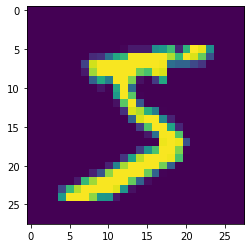

In [ ]:
first_image = X_train[0].reshape(28,28) #square image with 28x28 size or 784 pixels in total
plt.imshow(first_image)

Scaling: convert each pixel value between 0 and 1

In [ ]:
X_train = X_train/255
X_test = X_test/255

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

DNN config: 784->150->120->10

In [ ]:
s_model = Sequential()
s_model.add(Flatten(input_shape=(28,28)))
s_model.add(Dense(150, activation='sigmoid'))
s_model.add(Dense(120, activation='sigmoid'))
s_model.add(Dense(10, activation='softmax'))
s_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1210      
Total params: 137,080
Trainable params: 137,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
150*(784+1)


117600

In [ ]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate=0.01)
s_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = s_model.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.8785 - accuracy: 0.7902
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.7501 - accuracy: 0.8181
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.6599 - accuracy: 0.8364
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.5939 - accuracy: 0.8503
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.5443 - accuracy: 0.8593


In [ ]:
print(history.history)

{'loss': [0.8785126805305481, 0.7501293420791626, 0.6598784923553467, 0.5938922762870789, 0.5442766547203064], 'accuracy': [0.790233314037323, 0.8181166648864746, 0.8364166617393494, 0.8502500057220459, 0.8592833280563354]}


DNN config: 784->500->250->100->10

In [ ]:
d_model = Sequential()
d_model.add(Flatten(input_shape=(28,28)))
d_model.add(Dense(500, activation='sigmoid'))
d_model.add(Dense(250, activation='sigmoid'))
d_model.add(Dense(100, activation='sigmoid'))
d_model.add(Dense(10, activation='softmax'))
d_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_19 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
500*(784+1)

392500

In [ ]:
d_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
d_model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1)

Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 2.3043 - accuracy: 0.1221
Epoch 2/50
938/938 [==============================] - 5s 6ms/step - loss: 2.2819 - accuracy: 0.1673
Epoch 3/50
938/938 [==============================] - 5s 6ms/step - loss: 2.2629 - accuracy: 0.2302
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 2.2321 - accuracy: 0.3145
Epoch 5/50
938/938 [==============================] - 5s 6ms/step - loss: 2.1717 - accuracy: 0.3896
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 2.0420 - accuracy: 0.4506
Epoch 7/50
938/938 [==============================] - 5s 6ms/step - loss: 1.8173 - accuracy: 0.5224
Epoch 8/50
938/938 [==============================] - 5s 6ms/step - loss: 1.5471 - accuracy: 0.5967
Epoch 9/50
938/938 [==============================] - 5s 6ms/step - loss: 1.2690 - accuracy: 0.6560
Epoch 10/50
938/938 [==============================] - 5s 5ms/step - loss: 1.0580 - accuracy: 0.7018

Loss plot for comparing the models

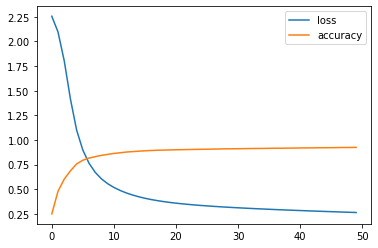

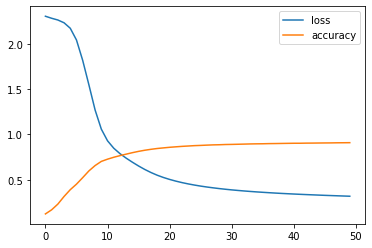

In [ ]:
loss_1 = pd.DataFrame(s_model.history.history)
loss_1.plot()
loss_2 = pd.DataFrame(d_model.history.history)
loss_2.plot()